# Data Analysis and Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display
pd.options.display.max_columns = None

In [3]:
#Load our dataset
df = pd.read_csv(".../database.csv")
df.head(4)

,playlist,track_id,name,duration_ms,song_popularity,explicit_lyrics,markets,name_length,lyrics,album,album_type,record_company,genres,month,year,holiday_effect,artist,solo_group,artist_popularity_mean,artist_popularity_max,followers_mean,followers_max,GT_mean_value,GT_std_value,GT_range_value,peak,age,country_code,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,top_2019,6v3KW9xbzN5yKLt9YKDYA2,Señorita,190799,85,False,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",8,i love it when you call me señorita i wish i ...,Shawn Mendes (Deluxe),album,Universal,pop,6,2019,1,"['Shawn Mendes', 'Camila Cabello']",group_mixed,89.5,90,21010809.5,25977484,18.677419,15.852816,90.5,"[2, 2]",22,"CA, US",9,0,4,0.0392,0.759,0.548,0.00,0.0828,-6.049,0.0290,0.749,116.967
1,top_2019,2Fxmhks0bxGSBdJ92vM42m,bad guy,194087,93,False,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",7,white shirt now red my bloody nose sleepin yo...,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",album,Universal,pop,3,2019,0,['Billie Eilish'],solo_female,95.0,95,24861338.0,24861338,28.096774,18.319071,88.0,[1],18,US,7,1,4,0.3280,0.701,0.425,0.13,0.1000,-10.965,0.3750,0.562,135.128
2,top_2019,0RiRZpuVRbi7oqRdSMwhQY,Sunflower - Spider-Man: Into the Spider-Verse,157560,85,False,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",9,ayy ayy ayy ayy ooh ooh ooh ooh ayy ayy ooh oo...,Hollywood's Bleeding,album,Universal,hip-hop/rap,9,2019,0,"['Post Malone', 'Swae Lee']",group_male,90.0,95,12668548.5,24646235,25.284946,13.563064,89.0,"[1, 0]",25,US,2,1,4,0.5330,0.755,0.522,0.00,0.0685,-4.368,0.0575,0.925,89.960
3,top_2019,6ocbgoVGwYJhOv1GgI9NsF,7 rings,178626,88,True,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",7,yeah breakfast at tiffanys and bottles of bub...,"thank u, next",album,Universal,pop,2,2019,0,['Ariana Grande'],solo_female,92.0,92,45042400.0,45042400,39.279570,15.498503,79.0,[1],26,US,1,0,4,0.5920,0.778,0.317,0.00,0.0881,-10.732,0.3340,0.327,140.048


# Target Variables

We want to define two target variables to tackle our subject in 2 different ways: **a linear regression and a classification task.** 

To do so, we will use the **``"song_popularity"``** feature as a continuous variable (even if it is a discrete one) to be our target for the linear regression model. 

When it comes to the classification task, we will create a binary variable **``"Hit/Non-Hit"``** based on a song rank in the Top2018 or the Top2019 playlists created by Spotify. The top 10% of each playlist will be ranked as being a **``"Hit"``.**

In [4]:
#Initializing all data points to 0
df['hit/non_hit'] = np.zeros(144, dtype=int)

In [5]:
#Getting the indexes for the top 10% of each year and assigning them the value 1
index_19 = list(df[df['playlist']=='top_2019'].index[0:int(np.ceil(len(
                df[df['playlist']=='top_2019'])*0.1))])
index_18 = list(df[df['playlist']=='top_2018'].index[0:int(np.ceil(len(
                df[df['playlist']=='top_2018'])*0.1))])

indexes = index_19 + index_18

for index in indexes:
    df.at[index, 'hit/non_hit'] = 1

In [6]:
#Re-ordering the columns
columns = ['song_popularity', 'hit/non_hit', 'playlist', 'track_id', 'name', 'duration_ms', 'explicit_lyrics', 
           'markets', 'name_length', 'lyrics', 'album', 'album_type', 'record_company', 'genres', 'month', 'year', 
           'holiday_effect', 'artist', 'solo_group', 'artist_popularity_mean', 'artist_popularity_max', 
           'followers_mean', 'followers_max', 'GT_mean_value', 'GT_std_value', 'GT_range_value', 'peak', 
           'age', 'country_code', 'key', 'mode', 'time_signature', 'acousticness', 'danceability', 'energy', 
           'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence', 'tempo']
df = df[columns]

In [7]:
#Dropping useless columns
df.drop(labels=['playlist', 'track_id', 'album'], axis=1, inplace=True)

**Some data engineering:**

In [8]:
df['explicit_lyrics'] = df['explicit_lyrics'].apply(lambda x: 1 if x else 0)

# Univariate Analysis

In [10]:
#Nb of features and examples in our dataset
df.shape

(144, 38)

In [11]:
#Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 38 columns):
song_popularity           144 non-null int64
hit/non_hit               144 non-null int64
name                      144 non-null object
duration_ms               144 non-null int64
explicit_lyrics           144 non-null int64
markets                   144 non-null object
name_length               144 non-null int64
lyrics                    144 non-null object
album_type                144 non-null object
record_company            144 non-null object
genres                    144 non-null object
month                     144 non-null int64
year                      144 non-null int64
holiday_effect            144 non-null int64
artist                    144 non-null object
solo_group                144 non-null object
artist_popularity_mean    144 non-null float64
artist_popularity_max     144 non-null int64
followers_mean            144 non-null float64
followers_max             14

In our dataset, we have a sample of 144 observations and we have 2 target variables in addition to 36 features, both numerical or Qualitative/categorical.

**Quantitative:**
* ``song_popularity`` is a target variable.
* ``duration_ms`` is the duration in miliseconds // or minutes and seconds (i.e. the numbers following the . are seconds)
* ``name_length`` is the length of the song name.
* ``artist_popularity_mean`` is the average artist popularity based on all the songs of the artists and their listenning count.   
* ``artist_popularity_max`` is the maximum artist popularity if several artists for a same song.
* ``followers_mean`` is the average number of followers for the artists.
* ``followers_max`` is  the maximum number of followers if several artists for a same song.
* ``GT_mean_value`` is the mean of all interest values over a 3-month period (see the Database notebook for more information). 
* ``GT_std_value`` is the standard deviation of all interest values over a 3-month period (see the Database notebook for more information).
* ``GT_range_value`` is the range of all interest values over a 3-month period (see the Database notebook for more information).
* ``age`` is the age average for the artists of a given song.
* ``acousticness`` is a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.  
* ``danceability`` represents if a track is good for dancing based on a combination of elements such as tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
* ``energy`` is from 0.0 to 1.0 and represents a perceptual measure of intensity and activity in a song. If a song is fast, loud and noisy, it will have a value close to 1.0.
* ``instrumentalness`` indicates whether a track contains no vocals. The closer to 1.0, the greater likelihood the track contains no vocal content. Above 0.5, it is considered to be an instrumental track.
* ``liveness`` detects the presence of an audience in the recording. Values close to 1.0 indicates a great likelihood that the song was performed live (above 0.8).  
* ``loudness`` this value is an average of the loudness values across the entire song. It represents the quality of a sound and it is the primary psychological correlate of physical strength of a song. Values range between -60 and 0 db. 
* ``speechiness`` detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0. 
* ``valence`` is a measure of the musical positiveness of a track. More positive means happy, cheerful or euphoric, while more negative means sad, depressed or angry.
* ``tempo`` is the overall estimated tempo in beats per minute.          

**Qualitative:**
* ``hit/non_hit`` is a target variable.
* ``name`` of a song.
* ``explicit_lyrics`` is a binary variable indicating if a given song has explicit lyrics.
* ``markets`` is the list of countries where the song is available with ISO 3166-1 alpha-2 codes.
* ``lyrics`` the lyrics of the song that we will transform before working with.
* ``album_type`` binary variable indicating if the song was released on an album or a single.
* ``record_company`` is the main Majors behind a song.
* ``genres`` is the genre of a song.
* ``month`` is the month when the song was released.
* ``year`` could have been considered to be a numerical variable but we only have 3 different years.
* ``holiday_effect`` if a song is released before or during the summer breal.
* ``artist`` artist name.
* ``solo_group``indicates if we have a group or a solo as well as the genders.
* ``peak`` is a list of binary variables indicating for each artist if the Google Trends interest peak was before, at or after the release date of the album.
* ``country_code`` is a list of country codes for the artists of a song.
* ``key`` is the key associated to a track, mapped using Standard Pitch Class notation.
* ``mode`` is the modality (0=major or 1=minor) of a song.
* ``time signature`` is a mean to indicate how many beats are in each bar and it should be equal to 4 for most of our songs.

In [12]:
#Check for missing values (should not have any due to past work)
df.isnull().sum()

song_popularity           0
hit/non_hit               0
name                      0
duration_ms               0
explicit_lyrics           0
markets                   0
name_length               0
lyrics                    0
album_type                0
record_company            0
genres                    0
month                     0
year                      0
holiday_effect            0
artist                    0
solo_group                0
artist_popularity_mean    0
artist_popularity_max     0
followers_mean            0
followers_max             0
GT_mean_value             0
GT_std_value              0
GT_range_value            0
peak                      0
age                       0
country_code              0
key                       0
mode                      0
time_signature            0
acousticness              0
danceability              0
energy                    0
instrumentalness          0
liveness                  0
loudness                  0
speechiness         

In [13]:
df['artist'] = df['artist'].apply(lambda x: x.replace('[', '').replace(']', '').replace(
                                  "'", '').replace('"', ''))                  

In [14]:
#Count the number of unique artists in the Dataset
#We already know that we have 144 unique songs
artist_list = [artist for artists in df.artist for artist in artists.split(', ')]
len(set(artist_list))

146

**We have 146 unique artists involved for 144 songs. Let's figure out the most successful ones:**

In [15]:
#Display the 20 most successful artists
pd.Series(artist_list).value_counts()[0:20]

Post Malone       10
Drake              9
Ozuna              8
Khalid             7
XXXTENTACION       6
Ed Sheeran         6
Bad Bunny          5
Ariana Grande      5
Cardi B            5
J Balvin           4
Billie Eilish      4
Daddy Yankee       4
Selena Gomez       4
Marshmello         4
Kendrick Lamar     3
Camila Cabello     3
Sam Smith          3
Dua Lipa           3
Halsey             3
Shawn Mendes       3
dtype: int64

Text(0.5, 0, 'Number of songs in the dataset')

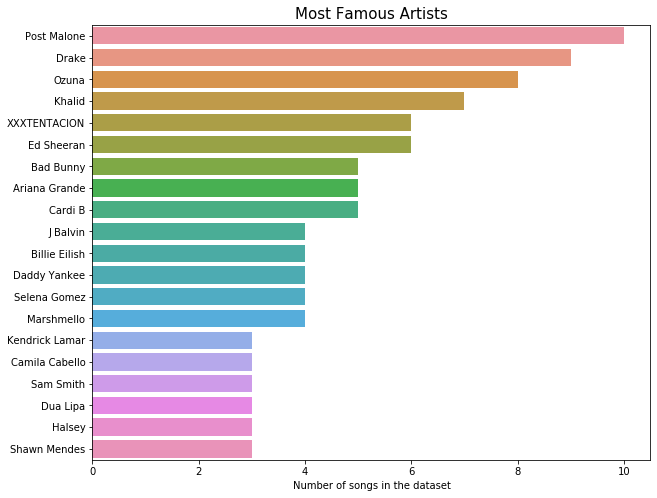

In [16]:
#Countplot of the 20 most successful artists
plt.figure(figsize=(10,8))
order = pd.Series(artist_list).value_counts()[0:20].index
sns.countplot(y=pd.Series(artist_list), order=order)
plt.title('Most Famous Artists', fontsize=15);
plt.xlabel('Number of songs in the dataset', fontsize=10)
#plt.savefig('1-Most Famous Artists.png', dpi=300)

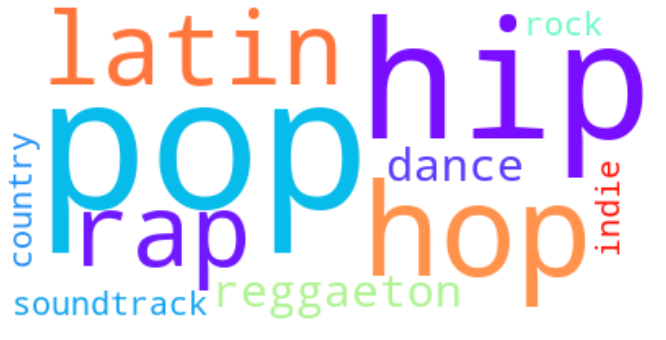

In [17]:
#The main genres for Hit songs
from wordcloud import WordCloud

plt.figure(figsize=(12,6))
genres_wds = df['genres'].value_counts().keys()

wc = WordCloud(colormap="rainbow",background_color="white").generate(" ".join(genres_wds))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")
plt.show()

#plt.savefig("10-wordcloud_genres.png", dpi=400)

**Descriptive Statistics over our dataset:**

In [18]:
pd.set_option('precision', 3)

In [19]:
#To differentiate Quantitative and Qualitative variables (since some of the qualitative ones are already encoded as
#numbers)

quantitative = ['song_popularity', 'duration_ms', 'name_length', 'artist_popularity_mean', 'artist_popularity_max',
                'followers_mean', 'followers_max', 'GT_mean_value', 'GT_std_value', 'GT_range_value', 'age', 
                'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 
                'valence', 'tempo']

qualitative = ['hit/non_hit', 'name', 'explicit_lyrics', 'markets', 'lyrics', 'album_type', 'record_company', 'genres', 
               'month', 'year', 'holiday_effect', 'artist', 'solo_group', 'peak', 'country_code', 'key', 'mode', 
               'time_signature']

In [20]:
#Describe for qualitative values
df[quantitative].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
song_popularity,144.0,7.730e+01,1.605e+01,1.000e+01,7.700e+01,8.200e+01,8.500e+01,9.400e+01
duration_ms,144.0,2.032e+05,4.101e+04,9.547e+04,1.807e+05,2.013e+05,2.202e+05,4.179e+05
name_length,144.0,1.048e+01,5.315e+00,1.000e+00,7.000e+00,1.000e+01,1.300e+01,4.000e+01
artist_popularity_mean,144.0,8.784e+01,6.336e+00,6.300e+01,8.400e+01,8.900e+01,9.262e+01,9.900e+01
artist_popularity_max,144.0,9.013e+01,6.396e+00,6.300e+01,8.700e+01,9.150e+01,9.500e+01,1.000e+02
followers_mean,144.0,1.552e+07,1.359e+07,1.279e+05,5.668e+06,1.269e+07,2.028e+07,6.294e+07
followers_max,144.0,1.940e+07,1.551e+07,2.457e+05,7.028e+06,1.924e+07,2.465e+07,6.294e+07
GT_mean_value,144.0,3.568e+01,1.354e+01,9.548e+00,2.539e+01,3.439e+01,4.529e+01,7.703e+01
GT_std_value,144.0,1.473e+01,3.044e+00,8.455e+00,1.270e+01,1.429e+01,1.621e+01,3.016e+01
GT_range_value,144.0,8.165e+01,1.133e+01,3.700e+01,7.538e+01,8.300e+01,9.000e+01,1.000e+02


**Key Findings**
* Song Popularity is asymetrically distributed: we have more upper values. This is an issue for a Regression problem. Since the lowest values are scarce, they can be considered to be "extreme" values
* Low std for song duration due to the similarity of songs in our dataset (dance song of approximately 3.38min). The feature may not explain well our variable Song Popularity
* The couples artist_popularity_mean/artist_popularity_max and followers_mean/followers_max are similar distribution, which is normal due to the construction of the variables. We will have to make a choice because they will probably be highly correlated.
* Although, these variables have low std and a high mean. We mostly have popular artists in our dataset. 
* The Google Trends variables are "normally" distributed, a little bit skewed
* One extreme point for the age feature which may correspond to Queen: keep it as a representation of the cases where an old song becomes famous again or delete it? 
* Song in our dataset are not very acoustic (we suppose that today, most hit songs use eletronic instruments or transform acoustic song with eletronic devices)
* We mostly have dance and energetic songs in our dataset
* All our songs in the dataset have very low values of instrumentalness (almost 0) meaning that Spotify's Top playlist contains mostly songs with vocals. This feature might not be useful in the context of a regression analysis 

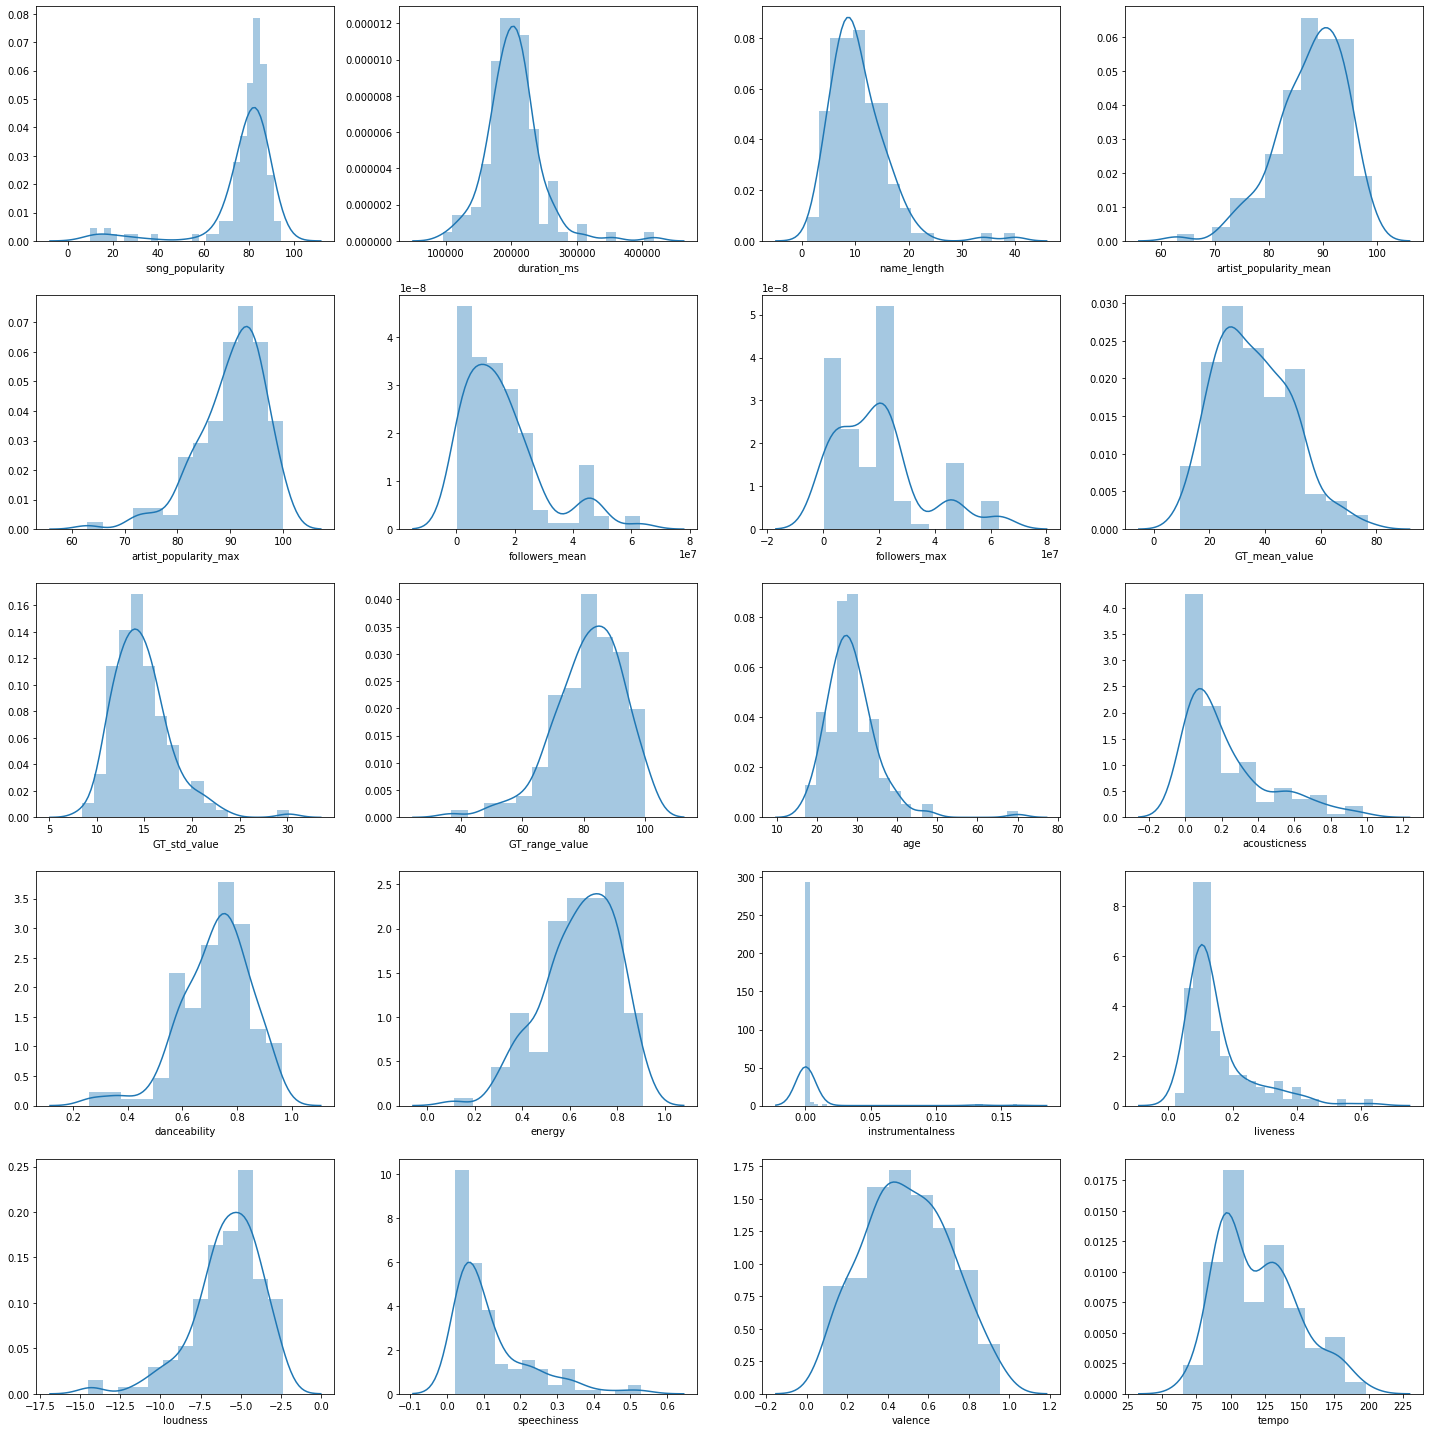

In [21]:
#Distribution plot for our quantitative variables
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20,20))
start, end = 0, 4
for axe in axes:
    for var, sub_axes in zip(quantitative[start:end], axe):
        sns.distplot(df[var], ax=sub_axes)
    start+=4
    end+=4
plt.tight_layout()
#fig.savefig("2-distribution_plot_quantitative.png", dpi=400)

At this point, we might consider that a linear regression over this dataset could be challenging due to the distribution of most of our features that do not represent the Song population and our target variable that is not normally distributed. We should consider using a subset of our dataset to exclude the extreme points (below 50 in popularity for instance)

In [22]:
#Describe for qualitative features
df[qualitative].describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hit/non_hit,144,NaN,NaN,NaN,0.104,0.307,0,0,0,0,1
name,144,144,Bella,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
explicit_lyrics,144,NaN,NaN,NaN,0.389,0.489,0,0,0,1,1
markets,144,21,"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lyrics,144,144,can you hear me sos help me put my mind to re...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
album_type,144,2,album,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
record_company,144,9,Universal,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genres,144,9,pop,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,144,NaN,NaN,NaN,5.99,3.19,1,3.75,6,8,12
year,144,NaN,NaN,NaN,2.02e+03,3.66,1.98e+03,2.02e+03,2.02e+03,2.02e+03,2.02e+03


**Key Findings**
* Unbalanced dataset: consider F1 score in classification task
* 21 unique distribution market patterns with one being present 113 times. We should delete this variable since it is not available before the release of a song
* Our dataset is mostly composed of albums (vs singles), which seems to be a more traditional way of releasing music
* Universal Music is the main record label for Top songs in 2018 and 2019
* Pop music dominates the market
* A significant share of our dataset was released during the Holiday period that we defined (average of 0.4)
* A majority of groups composed of male (can be a duo also)
* Mostly 4/4 time signature, which is not strange given the fact that we are looking at Hit songs (popular time signature today is 4/4)

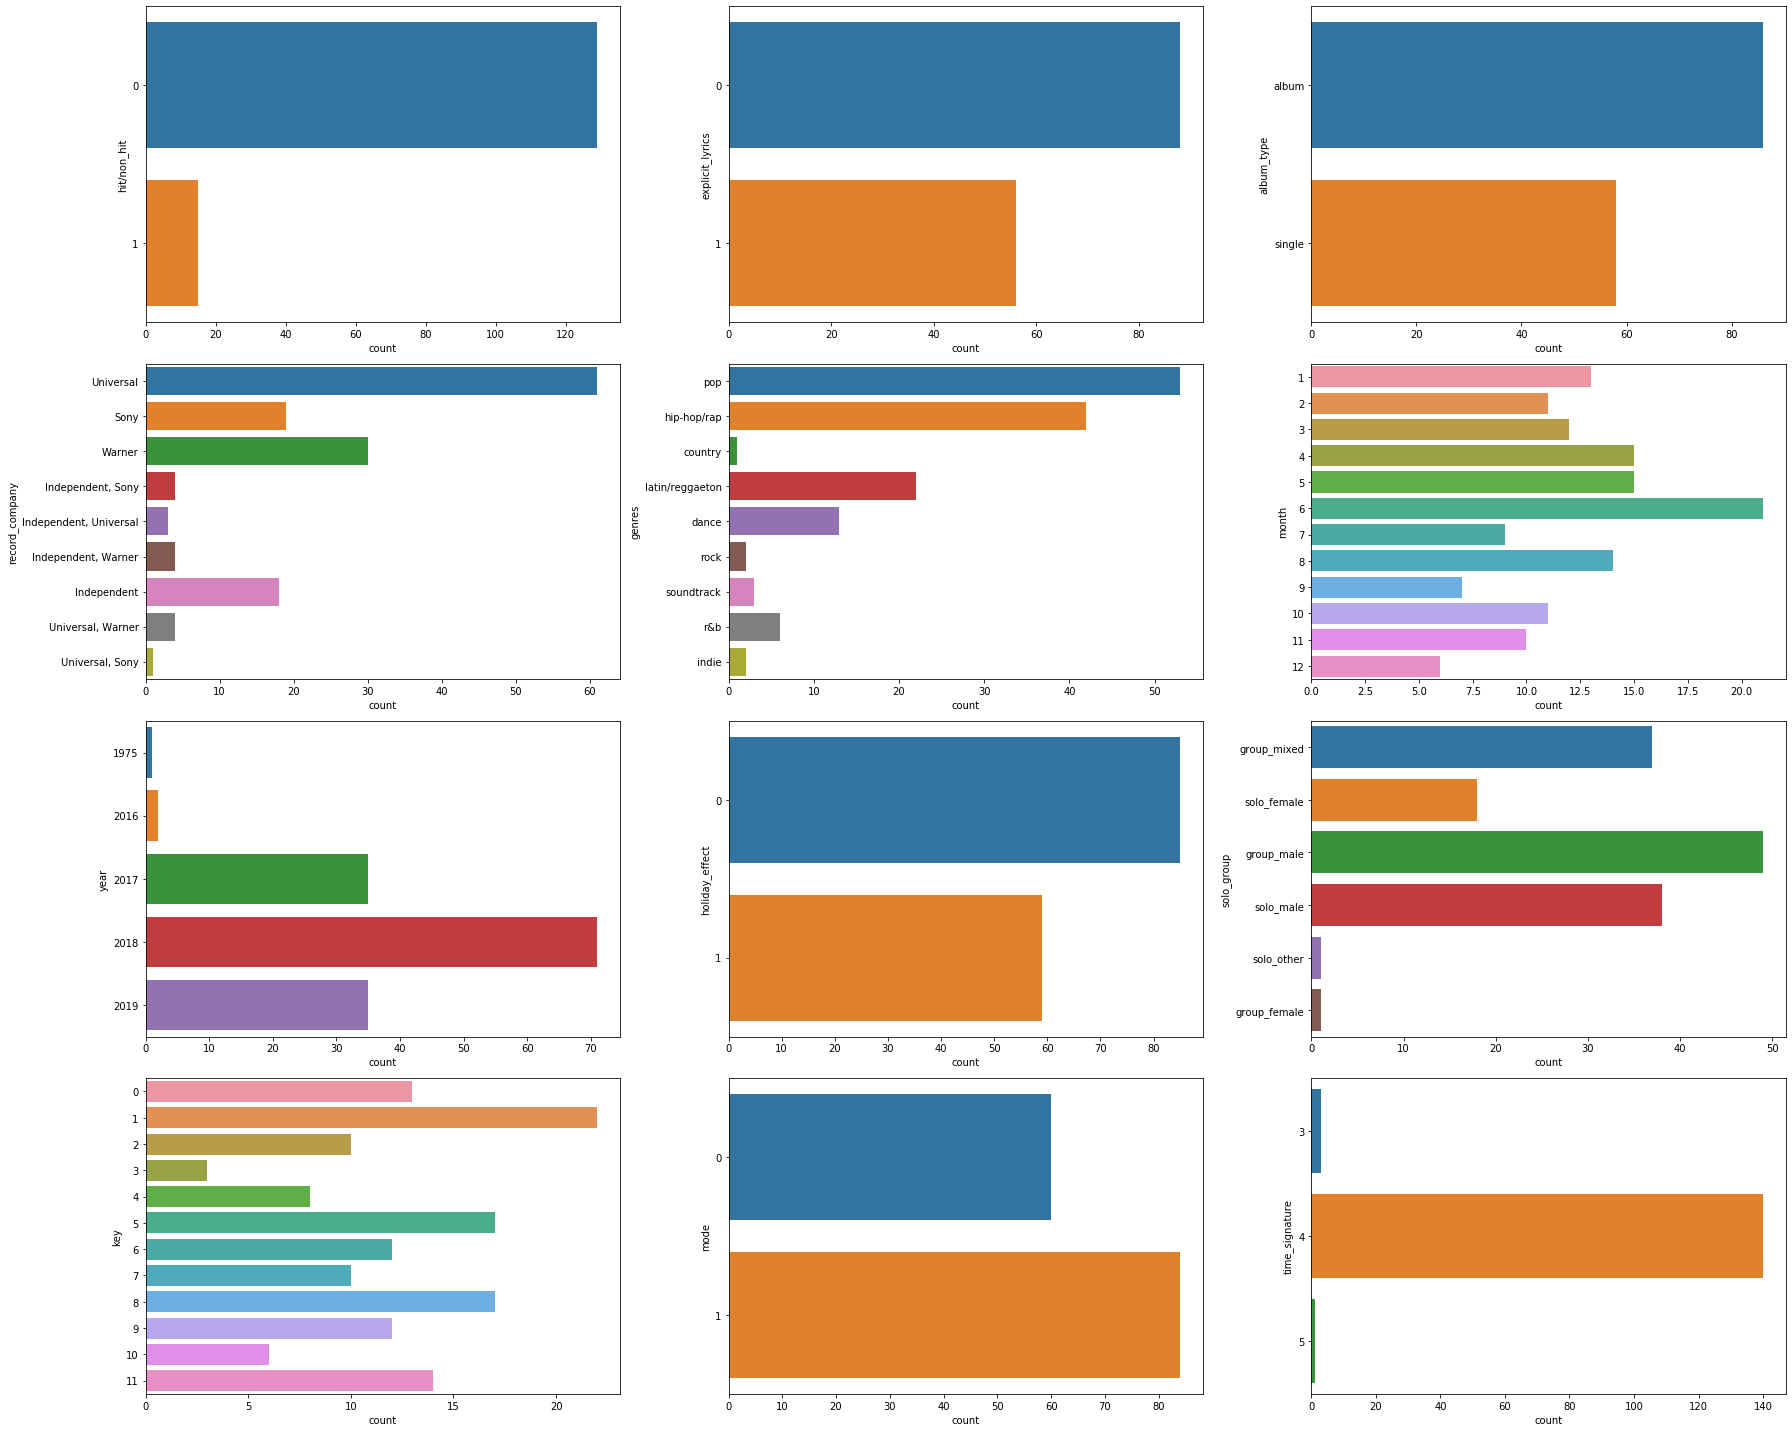

In [23]:
#Countplot for some of our qualitative variables that do not have 144 unique values
count_plot = ['hit/non_hit', 'explicit_lyrics', 'album_type', 'record_company', 'genres', 'month', 'year', 
              'holiday_effect', 'solo_group', 'key', 'mode', 'time_signature'] #'country_code', 'peak']

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,20))
start, end = 0, 3
for axe in axes:
    for var, sub_axes in zip(count_plot[start:end], axe):
        sns.countplot(y=var, data=df, ax=sub_axes)
    start+=3
    end+=3
plt.tight_layout()
#fig.savefig("3-countplot_qualitative.png", dpi=400)

* The features **``year``** and **``time_signature``** might not be useful for our models

In [24]:
#Now comparing values: Hit vs. Non-Hit
df_hit = df[df['hit/non_hit']==1]
df_non_hit = df[df['hit/non_hit']==0]

In [25]:
df_hit[quantitative].describe()

,song_popularity,duration_ms,name_length,artist_popularity_mean,artist_popularity_max,followers_mean,followers_max,GT_mean_value,GT_std_value,GT_range_value,age,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
count,15.000,15.000,15.000,15.000,15.000,1.500e+01,1.500e+01,15.000,15.000,15.000,15.000,15.000,15.000,15.000,1.500e+01,15.000,15.000,15.000,15.000,15.000
mean,85.733,201419.667,8.333,92.011,93.800,2.257e+07,2.601e+07,33.393,14.464,82.878,27.133,0.219,0.752,0.586,8.930e-03,0.171,-6.215,0.125,0.506,117.228
std,2.789,27767.709,2.690,4.905,4.586,1.329e+07,1.178e+07,11.485,1.769,8.698,5.290,0.203,0.079,0.150,3.351e-02,0.145,2.535,0.099,0.196,27.277
min,83.000,157066.000,4.000,79.000,82.000,1.600e+06,3.041e+06,18.570,11.542,69.500,18.000,0.033,0.585,0.317,0.000e+00,0.069,-10.965,0.029,0.129,75.023
25%,83.000,184712.500,7.000,90.500,92.500,1.537e+07,2.034e+07,24.895,13.545,75.583,24.000,0.047,0.720,0.521,0.000e+00,0.085,-7.115,0.064,0.354,93.054
50%,85.000,202620.000,8.000,92.000,95.000,1.825e+07,2.465e+07,30.016,14.693,87.000,26.000,0.124,0.755,0.560,0.000e+00,0.113,-5.833,0.105,0.510,123.994
75%,87.500,218046.000,9.500,95.000,96.000,2.475e+07,2.542e+07,41.234,15.553,90.000,29.500,0.330,0.803,0.623,6.505e-05,0.133,-4.624,0.127,0.616,138.048
max,93.000,253390.000,14.000,98.000,100.000,4.647e+07,4.647e+07,52.892,18.319,93.500,39.000,0.592,0.878,0.880,1.300e-01,0.552,-2.384,0.375,0.925,159.801


In [26]:
df_non_hit[quantitative].describe()

,song_popularity,duration_ms,name_length,artist_popularity_mean,artist_popularity_max,followers_mean,followers_max,GT_mean_value,GT_std_value,GT_range_value,age,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
count,129.000,129.000,129.000,129.000,129.000,1.290e+02,1.290e+02,129.000,129.000,129.000,129.000,1.290e+02,129.000,129.000,1.290e+02,129.000,129.000,129.000,129.000,129.000
mean,76.318,203383.116,10.729,87.358,89.705,1.470e+07,1.863e+07,35.945,14.758,81.509,28.845,2.256e-01,0.718,0.649,2.529e-03,0.148,-5.809,0.119,0.490,120.062
std,16.663,42362.530,5.493,6.320,6.453,1.343e+07,1.574e+07,13.778,3.162,11.616,6.656,2.355e-01,0.133,0.154,1.846e-02,0.097,2.091,0.105,0.211,28.952
min,10.000,95466.000,1.000,63.000,63.000,1.279e+05,2.457e+05,9.548,8.455,37.000,17.000,2.820e-04,0.258,0.111,0.000e+00,0.021,-14.505,0.023,0.079,64.934
25%,76.000,180822.000,7.000,83.500,86.000,4.288e+06,5.611e+06,25.398,12.634,75.500,25.000,4.820e-02,0.638,0.541,0.000e+00,0.093,-6.806,0.046,0.335,95.977
50%,81.000,201000.000,10.000,88.500,91.000,1.092e+07,1.742e+07,34.468,14.246,82.500,28.000,1.490e-01,0.734,0.675,0.000e+00,0.112,-5.626,0.073,0.483,116.073
75%,84.000,220293.000,13.000,92.000,94.000,1.925e+07,2.465e+07,46.559,16.410,89.500,32.000,3.230e-01,0.802,0.772,1.660e-05,0.167,-4.333,0.149,0.655,136.949
max,94.000,417920.000,40.000,99.000,100.000,6.294e+07,6.294e+07,77.032,30.159,100.000,70.000,9.780e-01,0.964,0.909,1.620e-01,0.636,-2.652,0.530,0.952,198.075


Most quantitative variables does not seem to have great differences between Hit and Non-Hits (except for the variables regarding the artist). This is something that we partially want due to the fact that we will try to tackle the Hit Song Science problem as a classification task too. We want to try to distinguish the top 10% of the "already" top hits. We will visually explore differences later on.

**One idea could be to run Student's t-test** to assess the differences between the means of several variables in our two samples. However, we only have 15 songs in our first sample, which is not large enough.

# Bivariate Analysis

## Correlation Analysis
### **Quantitative features and linear relationship:**

In [27]:
sns.set_context("paper")

(20.0, 0.0)

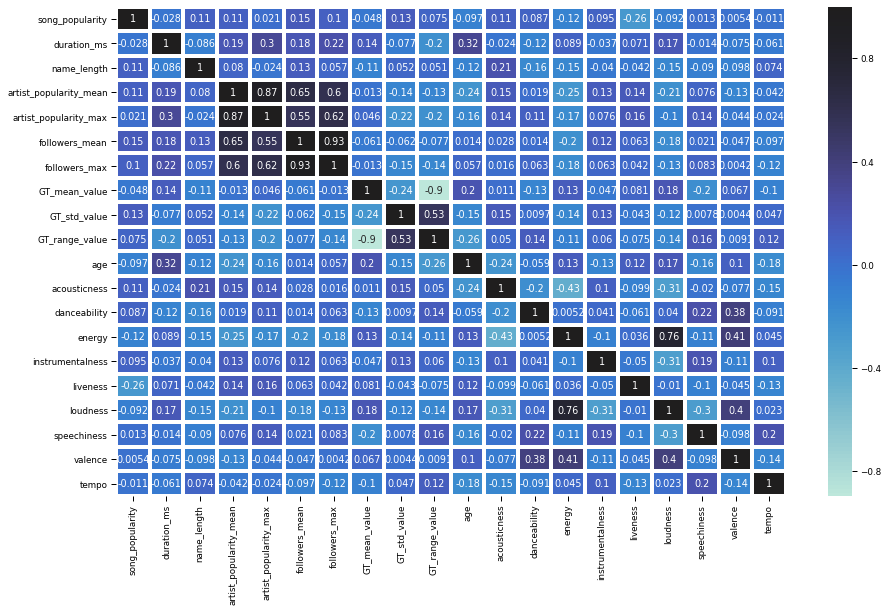

In [28]:
#Linear correlation
plt.figure(figsize=(15,9))

ax = sns.heatmap(data=df[quantitative].corr(), linewidth=3, annot=True, center=True)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5) # set the ylim to bottom and top to avoid wrong display

#plt.savefig("4-matrix_lin_corr.png", dpi=400)

**Key Findings:**
* Poor linear correlation between our target variable song_popularity and the other quantitative features
* Strange to have such a low correlation with artist_popularity_ because it is supposed to be the mean of that value for every song of an artist
* Some high correlations between our "independent" variables: some were expected 
 * artist_popularity_mean / artist_popularity_max (0.87)
 * artist_popularity_mean / followers_mean (0.65)
 * artist_popularity_mean / followers_max (0.6)
 * artist_popularity_max / followers_mean (0.55)
 * artist_popularity_max / followers_max (0.62)
 * followers_mean / followers_max (0.93)
 * GT_range_value / GT_mean_value (-0.9)
 * GT_range_value / GT_std_value (0.53)
 * energy / acousticness are negatively correlated: a more energic song is less acoustic (-0.43)
 * energy / valence (0.41)
 * energy / loudness are highly correlated (0.76)
 * valence / loudness (0.4)

Pearson’s Correlation Coefficient describes a linear correlation between two variables and can be heavily influenced by extreme points. We believe that correlation coefficients with song_popularity could be improved by removing some of the extreme points. Indeed, our dataset lacks of unpopular songs and coefficients are penalized due to some unpopular songs in our dataset.

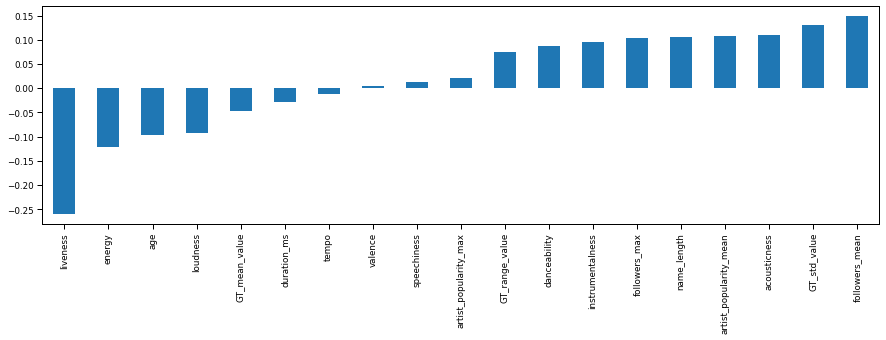

In [29]:
plt.figure(figsize=(15,4))
df[quantitative].corr()['song_popularity'][1:].sort_values().plot(kind='bar')
#plt.savefig("5-coeff_song_popu_full_df.png", dpi=400)

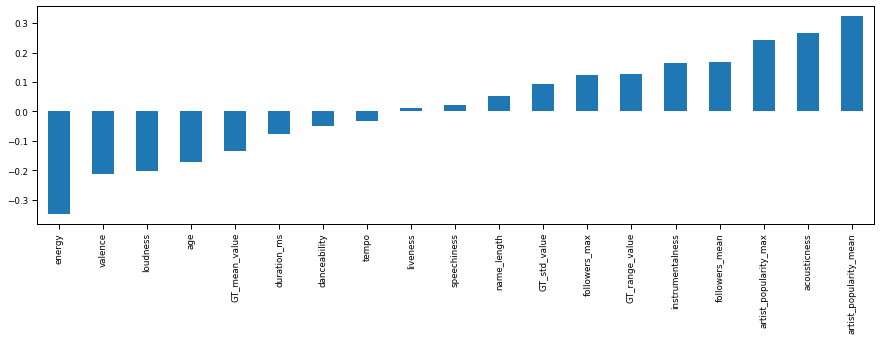

In [30]:
plt.figure(figsize=(15,4))
df[df['song_popularity'] >= 50][quantitative].corr()['song_popularity'][1:].sort_values().plot(kind='bar')
#plt.savefig("6-coeff_song_popu_cut_df.png", dpi=400)

It is interesting to see that we have a such a difference (take the example of livenes). The poor linear relationship between our target variable song_popularity and the "independent" variables can be explained by:
* Our dataset that is not representative of a random sample of the song population: maybe we should add more examples?
* We do not have linear correlation (but maybe other type of non-linear relation?)

**Now let's perform a Pearson’s Correlation Coefficient statistical test:**
* H0: the two samples are independent.
* H1: there is a dependency between the samples.

Limits: Assume a Gaussian distribution and linear relationship

In [31]:
from scipy.stats import pearsonr
def pearson_test(var1, var2):
    stat, p = pearsonr(var1, var2)
    print(f"stat={stat:.3f}, p-value={p:.3f}")
    if p >= 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')

In [32]:
#Statistical test for Linear Relationship:
for var in quantitative:
    print(f"\nTest for {var}:")
    pearson_test(df['song_popularity'], df[var])


Test for song_popularity:
stat=1.000, p-value=0.000
Probably dependent

Test for duration_ms:
stat=-0.028, p-value=0.737
Probably independent

Test for name_length:
stat=0.107, p-value=0.204
Probably independent

Test for artist_popularity_mean:
stat=0.107, p-value=0.201
Probably independent

Test for artist_popularity_max:
stat=0.021, p-value=0.799
Probably independent

Test for followers_mean:
stat=0.148, p-value=0.076
Probably independent

Test for followers_max:
stat=0.104, p-value=0.213
Probably independent

Test for GT_mean_value:
stat=-0.048, p-value=0.571
Probably independent

Test for GT_std_value:
stat=0.130, p-value=0.120
Probably independent

Test for GT_range_value:
stat=0.075, p-value=0.374
Probably independent

Test for age:
stat=-0.097, p-value=0.245
Probably independent

Test for acousticness:
stat=0.111, p-value=0.186
Probably independent

Test for danceability:
stat=0.087, p-value=0.297
Probably independent

Test for energy:
stat=-0.122, p-value=0.146
Probably indep

**Probably dependent:** ``liveness``

**Quantitative features and non-linear relationship:**

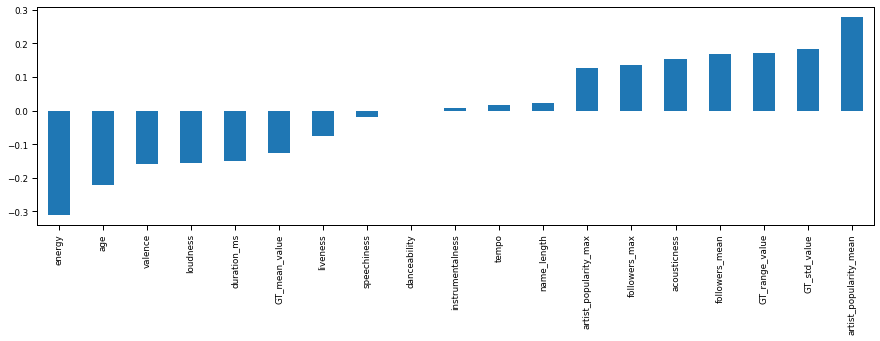

In [33]:
#Spearman correlation with song_popularity
plt.figure(figsize=(15,4))
df[quantitative].corr(method='spearman')['song_popularity'][1:].sort_values().plot(kind='bar')
#plt.savefig("7-coeff_song_popu_full_df_spearman.png", dpi=400)

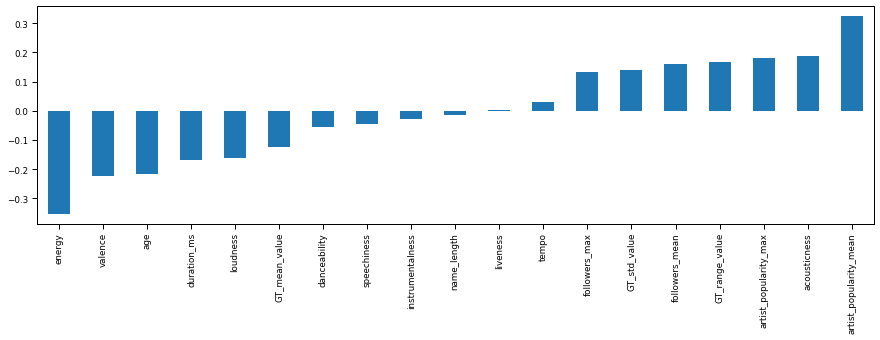

In [34]:
#Spearman correlation with song_popularity on reduced dataset
plt.figure(figsize=(15,4))
df[df['song_popularity'] >= 50][quantitative].corr(method='spearman')['song_popularity'][1:].sort_values().plot(kind='bar')
#plt.savefig("8-coeff_song_popu_cut_df_spearman.png", dpi=400)

We notive slightly better correlation but still not impressive. 

**Now let's perform a Spearman’s Correlation Coefficient statistical test:**
* H0: the two samples of variables are independent.
* H1: there is a dependency between the samples of variables.

Limits: Assume that observations are independent and identically distributed and can be ranked

In [35]:
from scipy.stats import spearmanr
def spearman_test(var1, var2):
    stat, p = spearmanr(var1, var2)
    print(f"stat={stat:.3f}, p-value={p:.3f}")
    if p >= 0.05:
        print('Probably independent')
    else:
        print('Probably dependent')

In [36]:
#Statistical test for monotonic Relationship:
for var in quantitative:
    print(f"\nTest for {var}:")
    spearman_test(df['song_popularity'], df[var])


Test for song_popularity:
stat=1.000, p-value=0.000
Probably dependent

Test for duration_ms:
stat=-0.151, p-value=0.071
Probably independent

Test for name_length:
stat=0.022, p-value=0.797
Probably independent

Test for artist_popularity_mean:
stat=0.277, p-value=0.001
Probably dependent

Test for artist_popularity_max:
stat=0.127, p-value=0.129
Probably independent

Test for followers_mean:
stat=0.167, p-value=0.046
Probably dependent

Test for followers_max:
stat=0.135, p-value=0.107
Probably independent

Test for GT_mean_value:
stat=-0.125, p-value=0.136
Probably independent

Test for GT_std_value:
stat=0.183, p-value=0.028
Probably dependent

Test for GT_range_value:
stat=0.170, p-value=0.041
Probably dependent

Test for age:
stat=-0.222, p-value=0.008
Probably dependent

Test for acousticness:
stat=0.153, p-value=0.067
Probably independent

Test for danceability:
stat=-0.000, p-value=0.999
Probably independent

Test for energy:
stat=-0.311, p-value=0.000
Probably dependent

Tes

**Probably dependent:** ``artist_popularity_mean``, ``followers_mean``, ``GT_std_value``, ``GT_range_value``, ``age``, ``energy``. 

One idea could have been to perform **Chi-Squared tests** for qualitative features, however, our dataset is not large enough to do so ==> Some cases of the contingency table would not be representative.
* H0: the two samples of variables are independent.
* H1: there is a dependency between the samples of variables.

Limits: Observations are independent and we have more than 25 examples in each cell of the contingency table

## Data visualization
NB: it is difficult to visualize data using **``hit/non_hit``** variable, because the sample is too small to be representative of a distribution across the features.

**Genres:**

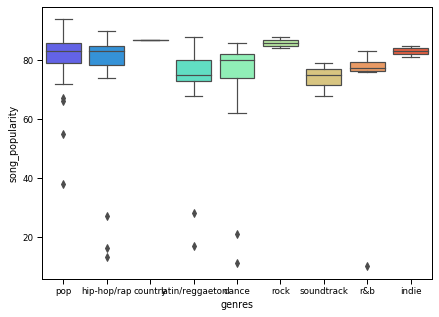

In [37]:
plt.figure(figsize=(7,5))
sns.boxplot(x='genres', y='song_popularity', data=df, palette='rainbow')

#plt.savefig("11-song_popu_genre_boxplot.png", dpi=400)

### Quantitative features
We then visualize the features for which we had a positive result with our Pearson or Spearman tests: ``liveness``, ``artist_popularity_mean``, ``followers_mean``, ``GT_std_value``, ``GT_range_value``, ``age``, ``energy`` 

**Liveness:**

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


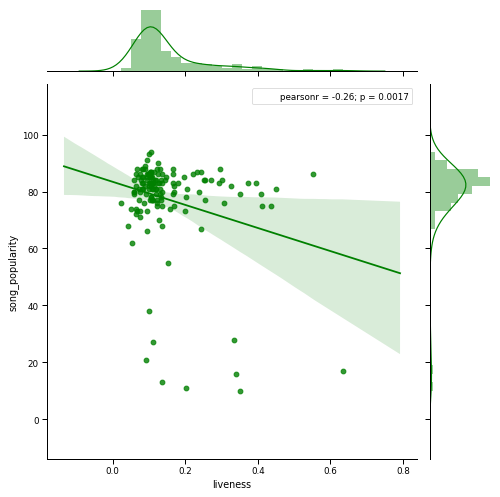

In [38]:
#Regression plot for liveness and popularity
sns.jointplot(x='liveness', y='song_popularity', data=df, kind='reg', height=7, 
              color='g', stat_func=pearsonr)

#plt.savefig("16-popu_liveness_reg.png", dpi=400)

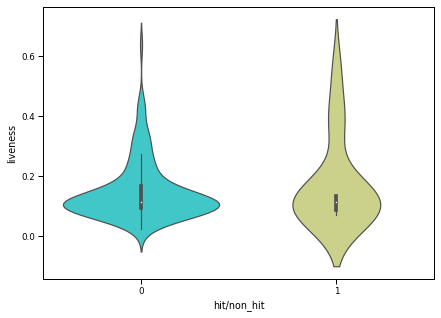

In [39]:
#We should not forget that we only have 15 examples for hit/non_hit=1
plt.figure(figsize=(7,5))
sns.violinplot(x='hit/non_hit', y='liveness', data=df, palette='rainbow')

#plt.savefig("17-hit_nonhit_liveness_violin.png", dpi=400)

This feature seems to be more appropriate for the definition of poplarity using song_popularity

**Artist_popularity_mean:**

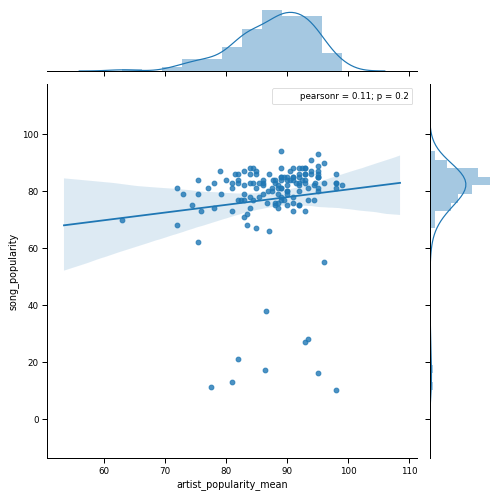

In [40]:
#Regression plot for artist_popularity and popularity
sns.jointplot(x='artist_popularity_mean', y='song_popularity', data=df, kind='reg', 
              height=7, stat_func=pearsonr)

#plt.savefig("18-popu_artist_popu_reg.png", dpi=400)

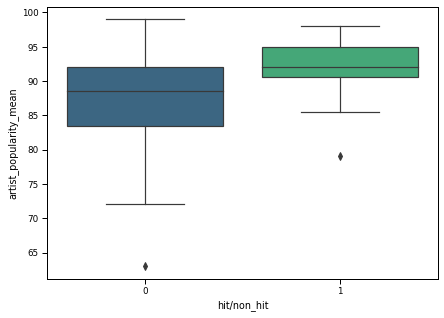

In [41]:
plt.figure(figsize=(7,5))
sns.boxplot(x='hit/non_hit', y='artist_popularity_mean', data=df, palette='viridis')

#plt.savefig("19-hit_nonhit_artist_popu_box.png", dpi=400)

Seems to be a "good" feature for both definition of popularity.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


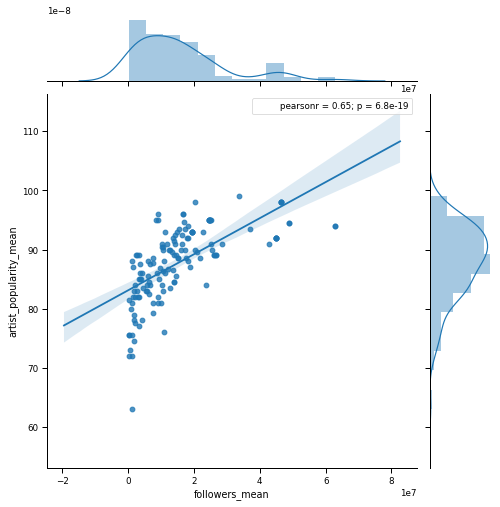

In [42]:
#Regression plot for artist_mean_value and followers_mean that have a significant pearsonr coeff
sns.jointplot(x='followers_mean', y='artist_popularity_mean', data=df, kind='reg', 
              height=7, stat_func=pearsonr)
plt.savefig("19-followers_artist_popu_regression.png", dpi=400)

In the regression model, we would probably select one of the two

**Followers_mean:**

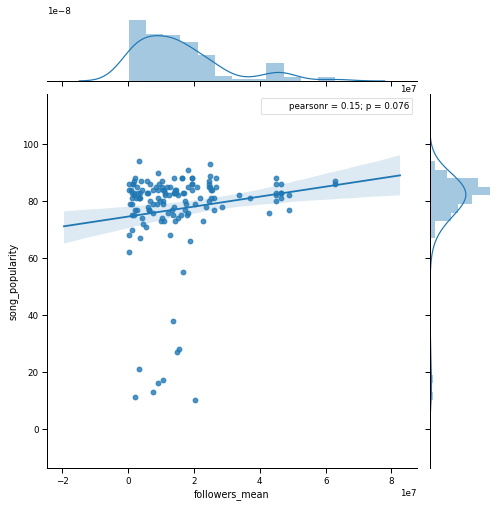

In [43]:
#Regression plot for followers and popularity
sns.jointplot(x='followers_mean', y='song_popularity', data=df, kind='reg', 
              height=7, stat_func=pearsonr)

#plt.savefig("20-popu_followers_reg.png", dpi=400)

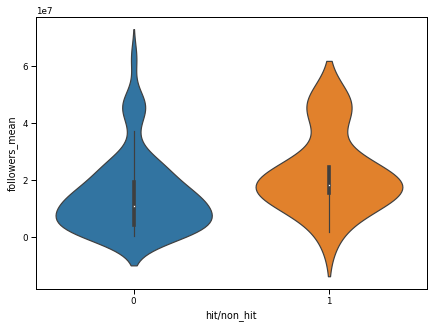

In [44]:
plt.figure(figsize=(7,5))
sns.violinplot(x='hit/non_hit', y='followers_mean', data=df)

#plt.savefig("21-hit_nonhit_followers_violin.png", dpi=400)

Seems to be a "good" feature for both definition of popularity.

**GT_std_value:**

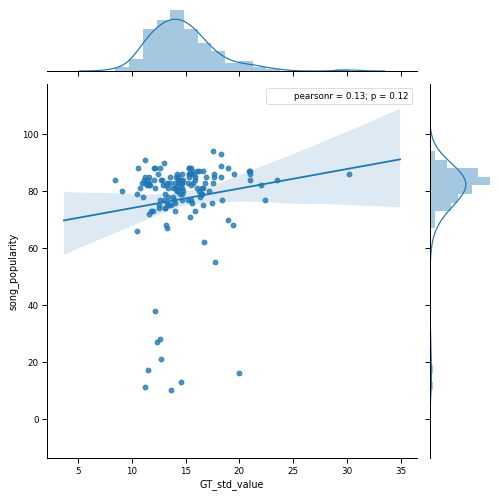

In [45]:
#Regression plot for GT_std_value and popularity
sns.jointplot(x='GT_std_value', y='song_popularity', data=df, kind='reg', 
              height=7, stat_func=pearsonr)

#plt.savefig("22-popu_GT_std_reg.png", dpi=400)

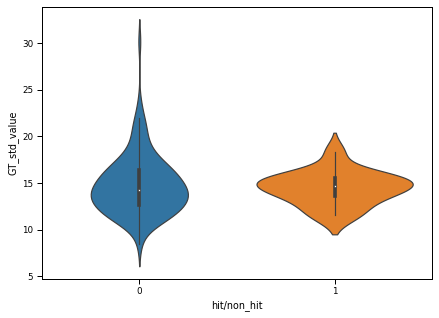

In [46]:
plt.figure(figsize=(7,5))
sns.violinplot(x='hit/non_hit', y='GT_std_value', data=df)

#plt.savefig("23-hit_nonhit_GT_std_violin.png", dpi=400)

This feature seems to be more appropriate for the definition of poplarity using song_popularity

**GT_range_value:**

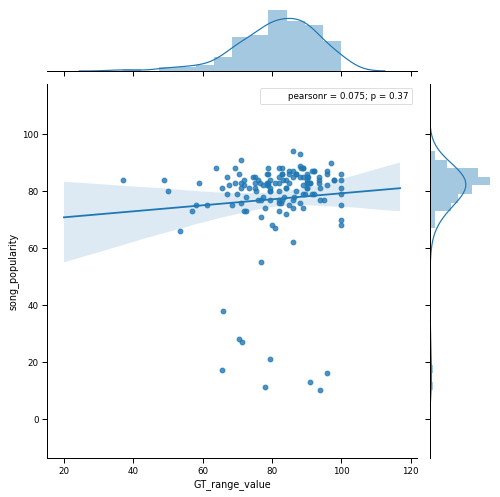

In [47]:
#Regression plot for GT_range_value and popularity
sns.jointplot(x='GT_range_value', y='song_popularity', data=df, kind='reg', 
              height=7, stat_func=pearsonr)

#plt.savefig("24-popu_GT_range_reg.png", dpi=400)

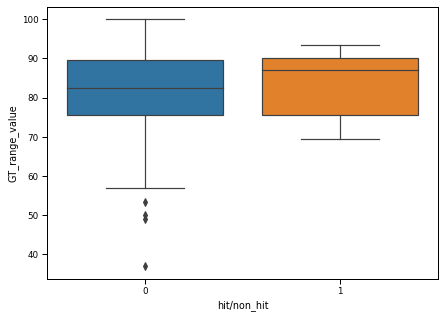

In [48]:
plt.figure(figsize=(7,5))
sns.boxplot(x='hit/non_hit', y='GT_range_value', data=df)

#plt.savefig("25-hit_nonhit_GT_std_box.png", dpi=400)

Seems to be a "good" feature for both definition of popularity (even if the distributions in the second graph are not that different)

**Age:**

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


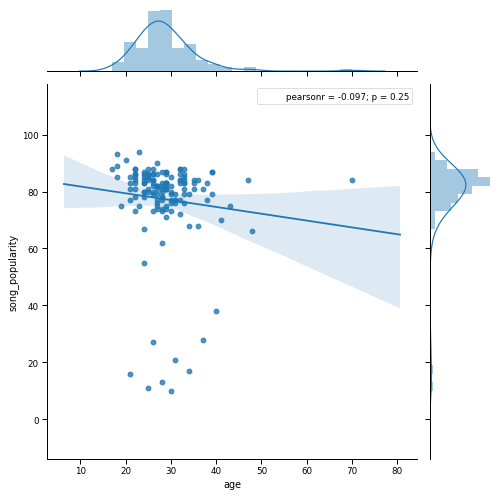

In [49]:
#Regression plot for age and popularity
sns.jointplot(x='age', y='song_popularity', data=df, kind='reg', 
              height=7, stat_func=pearsonr)

#plt.savefig("26-popu_age_reg.png", dpi=400)

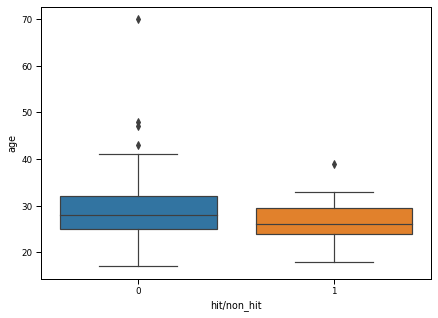

In [50]:
plt.figure(figsize=(7,5))
sns.boxplot(x='hit/non_hit', y='age', data=df)

#plt.savefig("27-hit_nonhit_age_box.png", dpi=400)

This feature seems to be more appropriate for the definition of poplarity using song_popularity

**Energy:**

<Figure size 864x432 with 0 Axes>

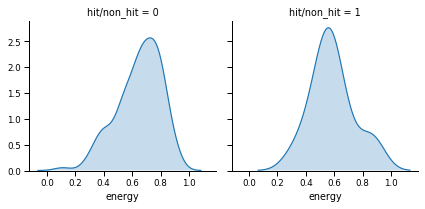

In [51]:
#Energy distribution according to Hit / Non-Hit
plt.figure(figsize=(12,6));
g = sns.FacetGrid(df, col="hit/non_hit");
g.map(sns.kdeplot, 'energy', shade=True);

#plt.savefig("14-energy_distrib_by_hit_nonhit.png", dpi=400)

Hits tends to be lower energetic.

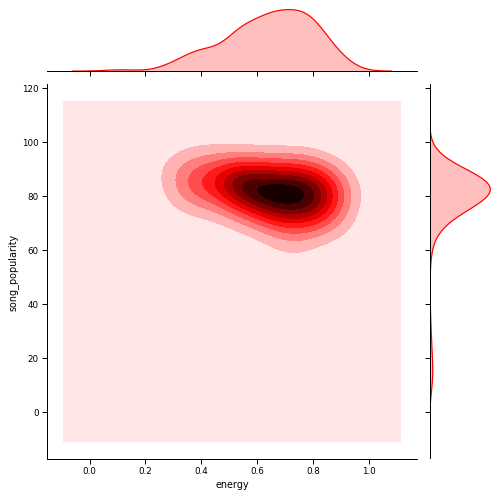

In [52]:
#Kde plot for energy with song popularity
sns.jointplot(x='energy', y='song_popularity', data=df, kind='kde', height=7, color='r')

#plt.savefig("15-popu_energy_kde.png", dpi=400)

We learn from our correlation matrix that energy and acousticness are correlated:

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


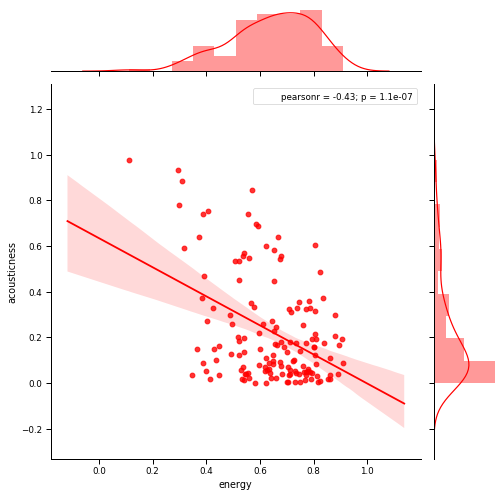

In [53]:
sns.jointplot(x='energy', y='acousticness', data=df, kind='reg', 
              height=7, stat_func=pearsonr, color='r')

#plt.savefig("15-acoustiness_energy_reg.png", dpi=400)

Seems to be a "good" feature for both definition of popularity (even if the distributions in the second graph are not that different)

**Then we visualize the other features that have lower correlation with song_popularity**:

**Tempo:**

<Figure size 864x432 with 0 Axes>

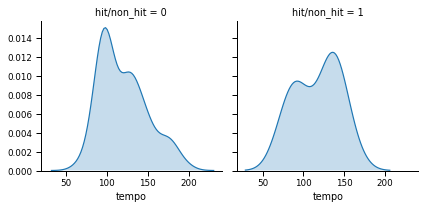

In [54]:
#Tempo distribution according to Hit / Non-Hit
plt.figure(figsize=(12,6));
g = sns.FacetGrid(df, col="hit/non_hit");
g.map(sns.kdeplot, 'tempo', shade=True);

#plt.savefig("12-tempo_distrib_by_hit_nonhit.png", dpi=400)

Seems that Hit songs do have a higher tempo.

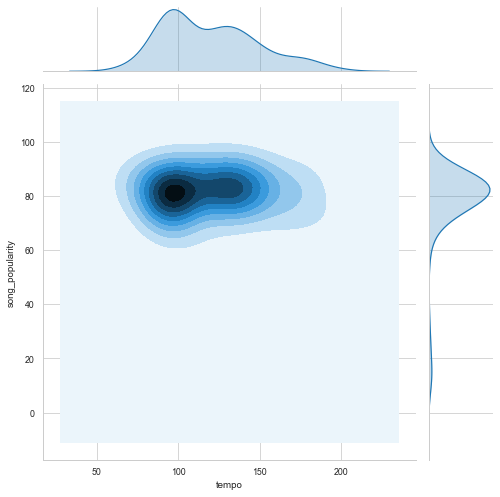

In [55]:
#Kde plot for tempo with song popularity
sns.set_style("whitegrid")
sns.jointplot(x='tempo', y='song_popularity', data=df, kind='kde', height=7)

#plt.savefig("13-popu_tempo_kde.png", dpi=400)

**Acousticness:**

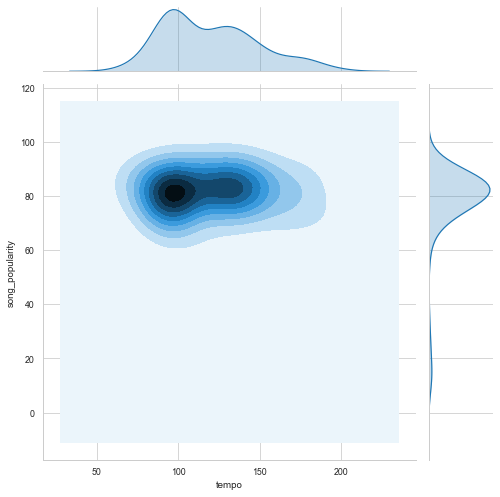

In [56]:
#Kde plot for acousticness with song popularity

sns.jointplot(x='tempo', y='song_popularity', data=df, kind='kde', height=7)

#plt.savefig("40-popu_acousticness_kde.png", dpi=400)

<Figure size 864x432 with 0 Axes>

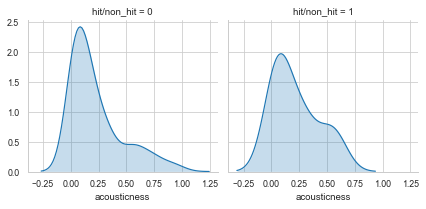

In [57]:
#acousticness distribution according to Hit / Non-Hit
plt.figure(figsize=(12,6));
g = sns.FacetGrid(df, col="hit/non_hit");
g.map(sns.kdeplot, 'acousticness', shade=True);

#plt.savefig("41-acousticness_distrib_by_hit_nonhit.png", dpi=400)

Same distribution.

**Danceability:**

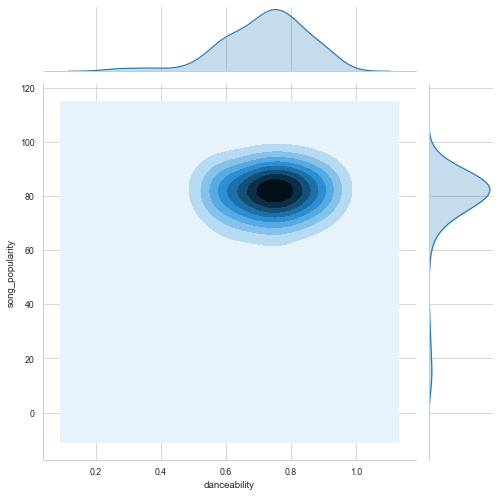

In [58]:
#Kde plot for danceability with song popularity

sns.jointplot(x='danceability', y='song_popularity', data=df, kind='kde', height=7)

#plt.savefig("42-popu_danceability_kde.png", dpi=400)

<Figure size 864x432 with 0 Axes>

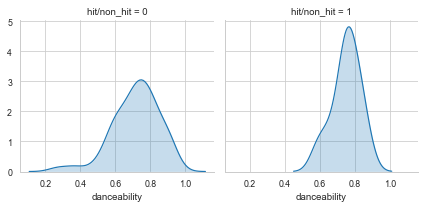

In [59]:
#danceability distribution according to Hit / Non-Hit
plt.figure(figsize=(12,6));
g = sns.FacetGrid(df, col="hit/non_hit");
g.map(sns.kdeplot, 'danceability', shade=True);

#plt.savefig("43-danceability_distrib_by_hit_nonhit.png", dpi=400)

Same distribution.

**Instrumentalness:**

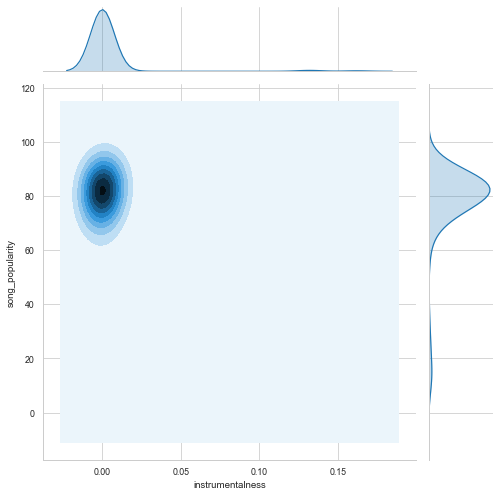

In [60]:
#Kde plot for instrumentalness with song popularity

sns.jointplot(x='instrumentalness', y='song_popularity', data=df, kind='kde', height=7)

plt.savefig("44-popu_instrumentalness_kde.png", dpi=400)

<Figure size 864x432 with 0 Axes>

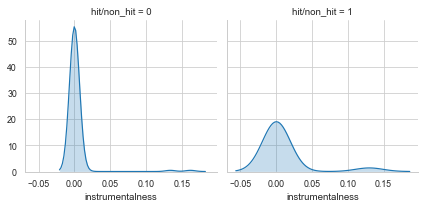

In [61]:
#instrumentalness distribution according to Hit / Non-Hit
plt.figure(figsize=(12,6));
g = sns.FacetGrid(df, col="hit/non_hit");
g.map(sns.kdeplot, 'instrumentalness', shade=True);

#plt.savefig("45-instrumentalness_distrib_by_hit_nonhit.png", dpi=400)

Same distribution.

**Loudness:**

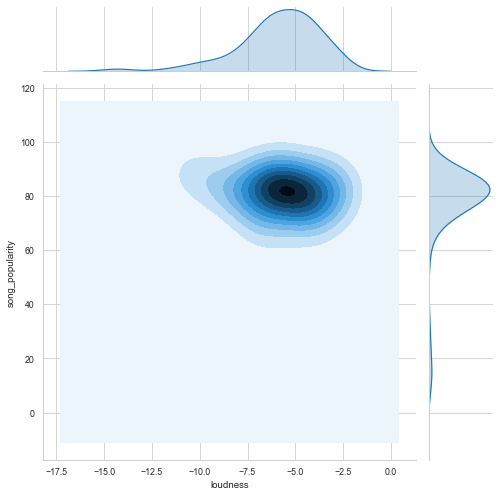

In [62]:
#Kde plot for loudness with song popularity

sns.jointplot(x='loudness', y='song_popularity', data=df, kind='kde', height=7)

#plt.savefig("46-popu_loudness_kde.png", dpi=400)

<Figure size 864x432 with 0 Axes>

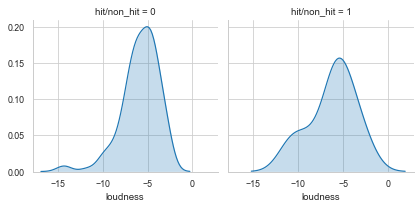

In [63]:
#loudness distribution according to Hit / Non-Hit
plt.figure(figsize=(12,6));
g = sns.FacetGrid(df, col="hit/non_hit");
g.map(sns.kdeplot, 'loudness', shade=True);

#plt.savefig("47-loudness_distrib_by_hit_nonhit.png", dpi=400)

Same distribution.

Now we look at the correlation between loudness and energy:

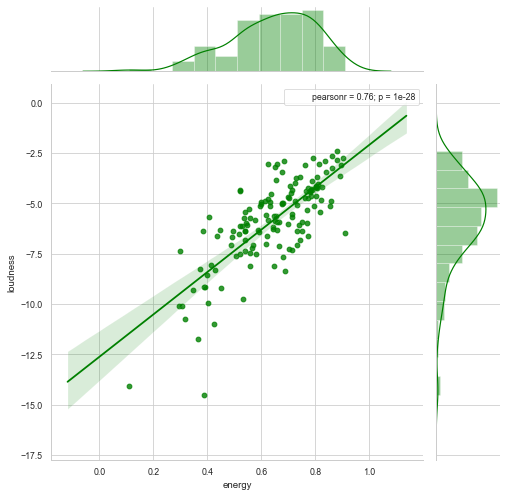

In [64]:
sns.jointplot(x='energy', y='loudness', data=df, kind='reg', 
              height=7, stat_func=pearsonr, color='g')

#plt.savefig("48-loudness_energy_reg.png", dpi=400)

We should remove one of the two in our regression model

Now we look at the correlation between loudness and valence:

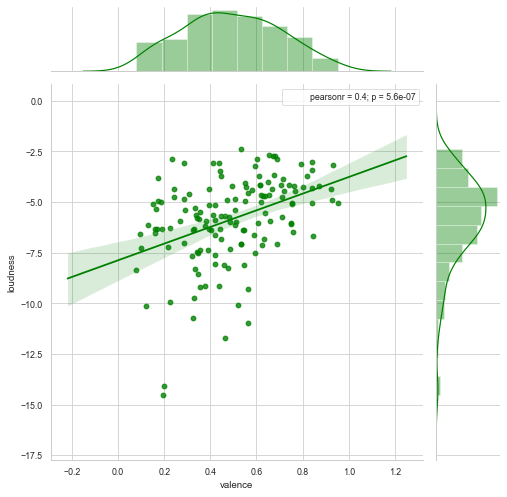

In [65]:
sns.jointplot(x='valence', y='loudness', data=df, kind='reg', 
              height=7, stat_func=pearsonr, color='g')

#plt.savefig("49-valence_loudness_reg.png", dpi=400)

We should remove one of the two in our regression model

**Valence:**

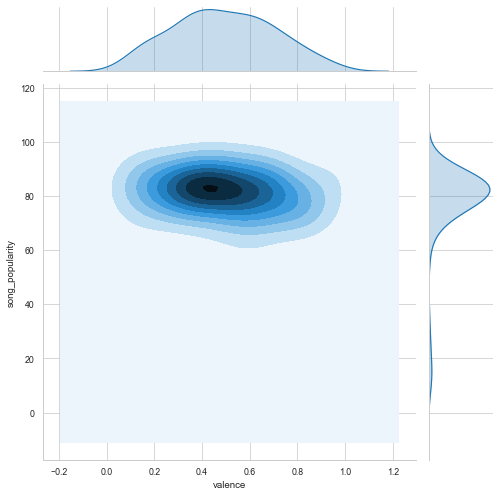

In [66]:
#Kde plot for valence with song popularity

sns.jointplot(x='valence', y='song_popularity', data=df, kind='kde', height=7)

#plt.savefig("50-popu_valence_kde.png", dpi=400)

<Figure size 864x432 with 0 Axes>

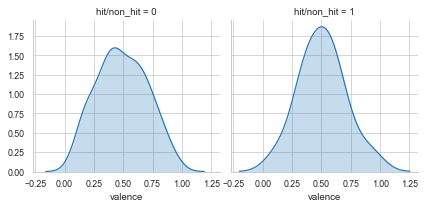

In [67]:
#valence distribution according to Hit / Non-Hit
plt.figure(figsize=(12,6));
g = sns.FacetGrid(df, col="hit/non_hit");
g.map(sns.kdeplot, 'valence', shade=True);

#plt.savefig("51-valence_distrib_by_hit_nonhit.png", dpi=400)

Similar distribution

Take a look at the relationship between valence and energy:

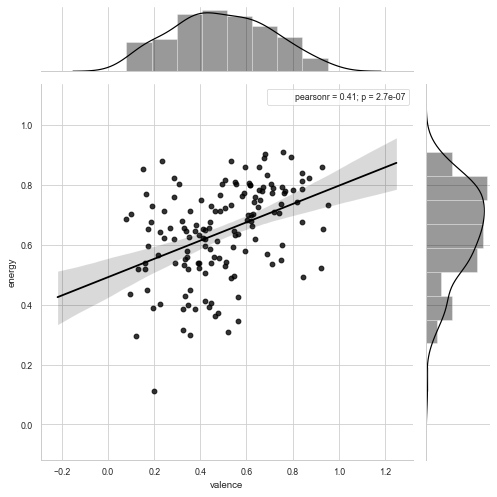

In [68]:
sns.jointplot(x='valence', y='energy', data=df, kind='reg', 
              height=7, stat_func=pearsonr, color='black')

#plt.savefig("52-valence_energy_reg.png", dpi=400)

**Speechiness:**

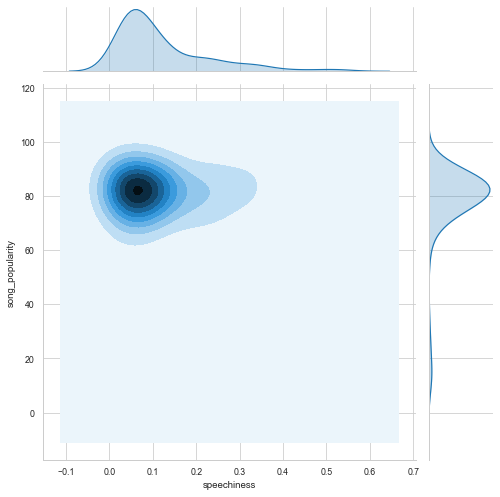

In [69]:
#Kde plot for speechiness with song popularity

sns.jointplot(x='speechiness', y='song_popularity', data=df, kind='kde', height=7)

#plt.savefig("53-popu_speechiness_kde.png", dpi=400)

<Figure size 864x432 with 0 Axes>

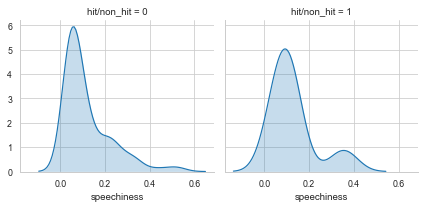

In [70]:
#speechiness distribution according to Hit / Non-Hit
plt.figure(figsize=(12,6));
g = sns.FacetGrid(df, col="hit/non_hit");
g.map(sns.kdeplot, 'speechiness', shade=True);

#plt.savefig("54-speechiness_distrib_by_hit_nonhit.png", dpi=400)

Maybe hits tend to have more speechiness.

**Duration_ms:**

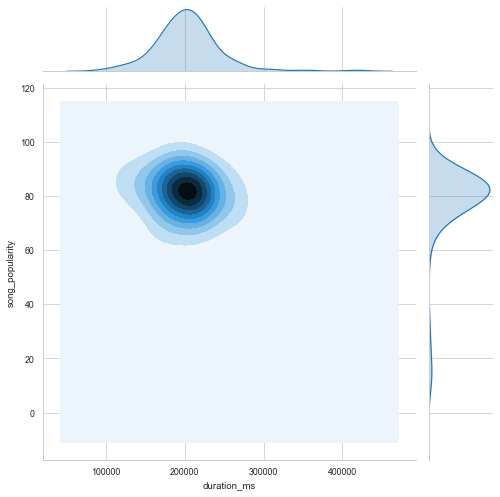

In [71]:
sns.jointplot(x='duration_ms', y='song_popularity', data=df, kind='kde', height=7)
#plt.savefig("38-popu_duration_ms_kde.png", dpi=400)

<Figure size 864x432 with 0 Axes>

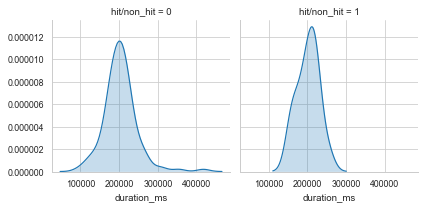

In [72]:
#duration distribution according to Hit / Non-Hit
plt.figure(figsize=(12,6));
g = sns.FacetGrid(df, col="hit/non_hit");
g.map(sns.kdeplot, 'duration_ms', shade=True);

#plt.savefig("38-duration_distrib_by_hit_nonhit.png", dpi=400)

Same distributions

**name_length:**

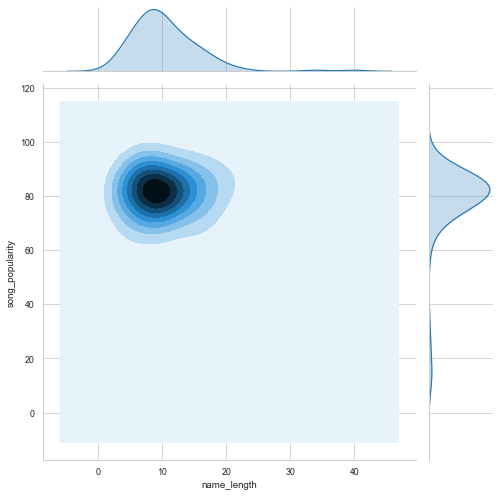

In [73]:
sns.jointplot(x='name_length', y='song_popularity', data=df, kind='kde', height=7)
#plt.savefig("39-popu_name_length_kde.png", dpi=400)

<Figure size 864x432 with 0 Axes>

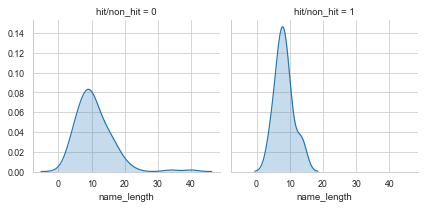

In [74]:
#name_length distribution according to Hit / Non-Hit
plt.figure(figsize=(12,6));
g = sns.FacetGrid(df, col="hit/non_hit");
g.map(sns.kdeplot, 'name_length', shade=True);

#plt.savefig("38-name_length_distrib_by_hit_nonhit.png", dpi=400)

Maybe the distribution is a bit different with shorter songs being hits.

### **Qualitative features visualization:**

**Mode and Key:**

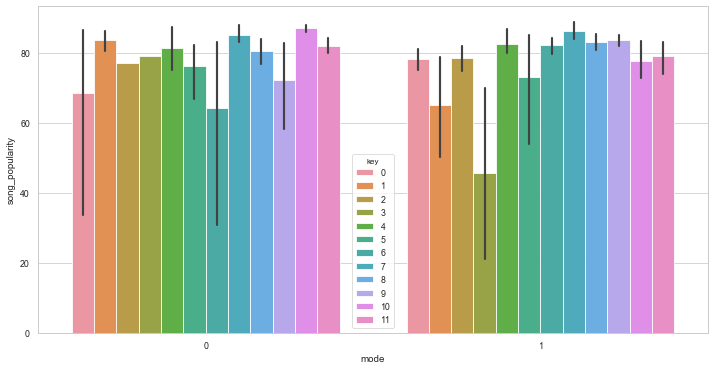

In [75]:
#Mode and Key are related in a given song so we visualize popularity combining
#these two features
plt.figure(figsize=(12,6))
sns.barplot(x='mode', y='song_popularity', data=df, hue='key')

#plt.savefig("9-popu_key_mode.png", dpi=400)

Seems like good combinations for popular songs are (high values and small confidence interval):
* Minor and keys C-sharp/D-flat, G, A-sharp and $B_b$
* Major and key G
Limits: we cannot observe significan differences, but still there are some variations

**Explicit_lyrics:**

NB: Understanding of the countplot for this feature with a hue using hit/non_hit should take into account that our classes are unbalanced

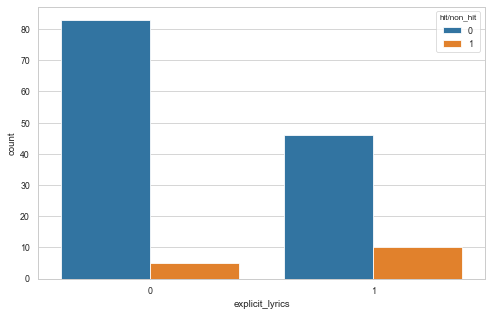

In [76]:
plt.figure(figsize=(8,5))
sns.countplot(x='explicit_lyrics', hue='hit/non_hit', data=df)

#plt.savefig("28-hit_nonhit_explicit_count.png", dpi=400)

Is it a trend? Seems like hits tends to have explicit lyrics (10/15 songs) while it is the contrary for non hits (more songs with no explicit lyrics)

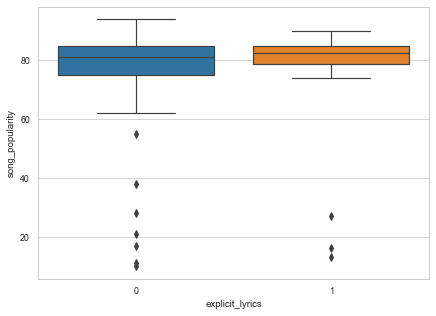

In [77]:
#Distribution of song_popularity according to explicit_lyrics
plt.figure(figsize=(7,5))
sns.boxplot(x='explicit_lyrics', y='song_popularity', data=df)

#plt.savefig("29-song_popu_explicit_lyrics_box.png", dpi=400)

**Album_type:**

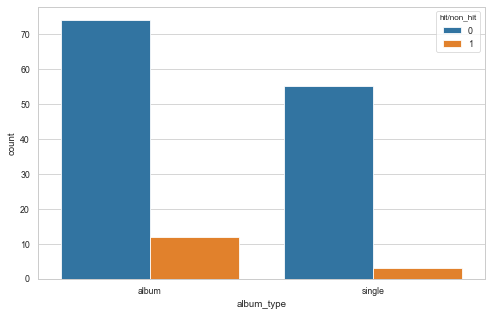

In [78]:
plt.figure(figsize=(8,5))
sns.countplot(x='album_type', hue='hit/non_hit', data=df)

#plt.savefig("30-hit_nonhit_album_type_count.png", dpi=400)

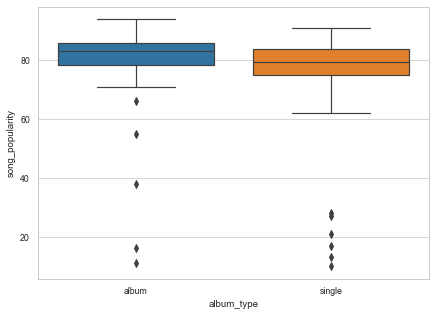

In [79]:
#Distribution of song_popularity according to album_type
plt.figure(figsize=(7,5))
sns.boxplot(x='album_type', y='song_popularity', data=df)

#plt.savefig("31-song_popu_album_type_box.png", dpi=400)

**Record_company:**

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

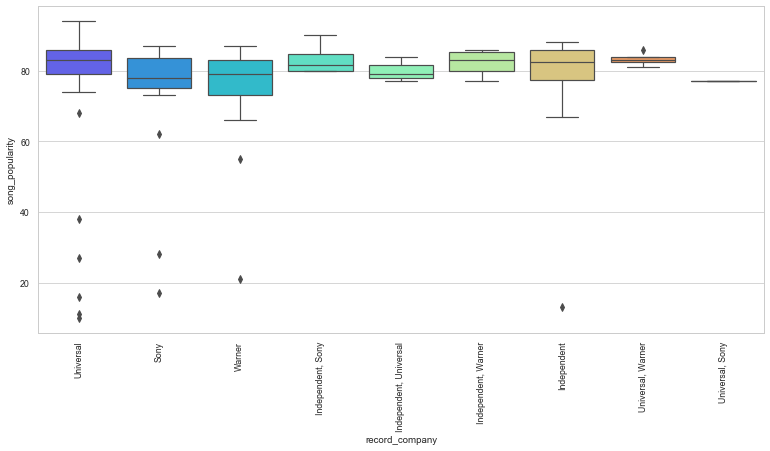

In [80]:
#Distribution of song_popularity by record companies
plt.figure(figsize=(13,6))
sns.boxplot(x='record_company', y='song_popularity', data=df, palette='rainbow')
plt.xticks(rotation=90)

#plt.savefig("32-song_popu_labels_box.png", dpi=400)

**Holiday_effect:**

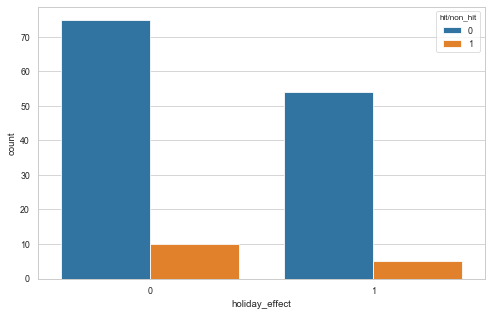

In [81]:
plt.figure(figsize=(8,5))
sns.countplot(x='holiday_effect', hue='hit/non_hit', data=df)

#plt.savefig("33-hit_nonhit_holiday_effec_count.png", dpi=400)

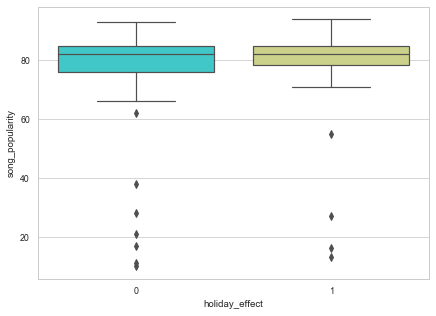

In [82]:
#Distribution of song_popularity according to holiday_effect
plt.figure(figsize=(7,5))
sns.boxplot(x='holiday_effect', y='song_popularity', data=df, palette='rainbow')

#plt.savefig("34-song_popu_holidays_effec_box.png", dpi=400)

**Solo_group:**

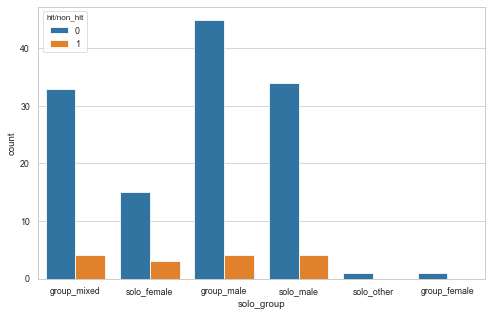

In [83]:
plt.figure(figsize=(8,5))
sns.countplot(x='solo_group', hue='hit/non_hit', data=df)

#plt.savefig("35-hit_nonhit_solo_group_count.png", dpi=400)

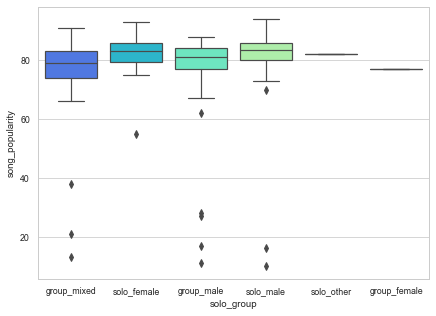

In [84]:
#Distribution of song_popularity according to solo_group
plt.figure(figsize=(7,5))
sns.boxplot(x='solo_group', y='song_popularity', data=df, palette='rainbow')

#plt.savefig("36-song_popu_solo_group_box.png", dpi=400)

**Country_code:**

In [85]:
country_code = [code for codes in df.country_code for code in codes.split(', ')]
len(set(country_code))

20

20 countries are represented by the artists in our dataset

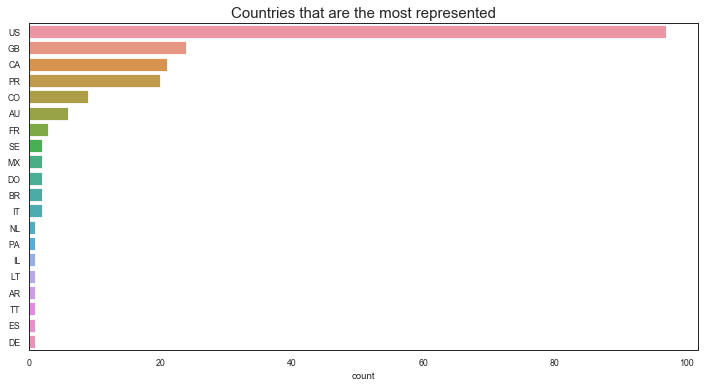

In [86]:
sns.set_style("white")
plt.figure(figsize=(12,6))
order = pd.Series(country_code).value_counts().index
sns.countplot(y=pd.Series(country_code), order=order)
plt.title('Countries that are the most represented', fontsize=15);

#plt.savefig('37-countries_representation.png', dpi=300)

**Key findings:**
* No clear relationship between features that was not described by our correlation analysis
* Hard to understand the relationship between ``hit/non_hit``and the other features due to the small sample we have

## Saving Dataset

In [89]:
df.to_csv("database_fin.csv", index=False)

In [36]:
print(df.skew())

duration_ms                1.253480
song_popularity           -3.032240
explicit_lyrics            0.460655
name_length                1.979509
month                      0.182111
year                     -11.265391
holiday_effect             0.371021
artist_popularity_mean    -0.835144
artist_popularity_max     -1.143826
followers_mean             1.380000
followers_max              1.098571
GT_mean_value              0.476917
GT_std_value               1.366784
GT_range_value            -0.869222
age                        2.167707
key                       -0.010811
mode                      -0.341631
time_signature            -2.809416
acousticness               1.346866
danceability              -0.880461
energy                    -0.601846
instrumentalness           6.847304
liveness                   2.101748
loudness                  -1.231761
speechiness                1.765686
valence                    0.088343
tempo                      0.605021
dtype: float64
